SIMPLE CODE TO COMPUTE EQUILIBRIUM TEMPERATURE

In [1]:
# Import libreries
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Parametri fisici
#######################################################################
sigma = 5.67e-8  #Costante di Stefan-Boltzmann (W/m²/K⁴)
S0 = 1370        # Costante solare (W/m²)
albedo = 0.3     # Albedo terrestre
epsilon = 1.   # Emissività degli strati atmosferici # corpi neri
N = 3          # Numero di strati atmosferici 
H_max = 10000   # Altezza massima dell'atmosfera (15 km)
altitude = np.linspace(2000,H_max,N)

# Flusso di energia solare incidente sulla superficie terrestre (diviso 4 per la geometria terrestre)
F_in = (1 - albedo) * S0 / 4


In [7]:
# Inizializzazione delle temperature (stima iniziale)
T_surf = (F_in / sigma) ** 0.25      # Temperatura della superficie terrestre senza atmosfera
T_layers = np.full(N, T_surf - 10)   # Strati più freddi della superficie inizialmente


In [8]:
# Iterazione per trovare l'equilibrio termico
######################################################################

for _ in range(1000): # 1000 più che sufficiente  
    
    # Radiazione emessa dalla superficie
    F_surface = sigma * T_surf**4

    # Radiazione emessa dagli strati atmosferici
    F_atmos = sigma * T_layers**4

    # Aggiornamento della temperatura degli strati atmosferici
    for i in range(N):
        if i == 0:
            # Lo strato più basso riceve energia dalla superficie e dallo strato superiore
            F_absorbed = epsilon * (F_surface + F_atmos[i + 1] if N > 1 else 0) / 2
        elif i == N - 1:
            # Lo strato più alto riceve energia solo dallo strato inferiore
            F_absorbed = epsilon * F_atmos[i - 1] / 2
        else:
            # Strati intermedi ricevono energia dagli strati sopra e sotto
            F_absorbed = epsilon * (F_atmos[i - 1] + F_atmos[i + 1]) / 2

        T_layers[i] = (F_absorbed / sigma) ** 0.25

    # Aggiornamento della temperatura della superficie
    T_surf = ((F_in + epsilon * F_atmos[0]) / sigma) ** 0.25

PLOT PROFILO TERMICO

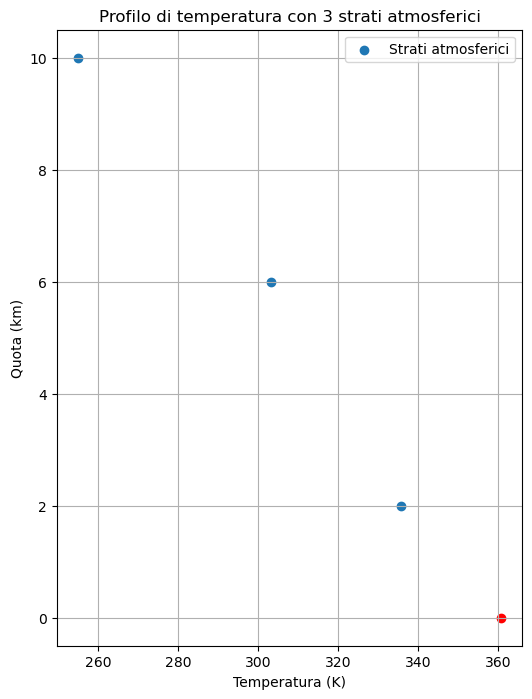

Temperature della superficie: 360.63 K
Temperatura dello strato 1: 335.60 K
Temperatura dello strato 2: 303.25 K
Temperatura dello strato 3: 255.00 K


In [9]:
# Plot del profilo di temperatura
plt.figure(figsize=(6, 8))
plt.scatter(T_layers, altitude / 1000, marker='o', label='Strati atmosferici')  # Conversione in km
#plt.axhline(y=0, color='r', linestyle='--', label=f'Superficie ({T_surf:.1f} K)')
plt.scatter(T_surf, 0, color='red')

plt.xlabel('Temperatura (K)')
plt.ylabel('Quota (km)')
#plt.xlim(200,320)
plt.legend()
plt.title(f'Profilo di temperatura con {N} strati atmosferici')
plt.grid()
plt.show()


# Stampa delle temperature finali dopo l'equilibrio
print(f"Temperature della superficie: {T_surf:.2f} K")
for i, T in enumerate(T_layers):
    print(f"Temperatura dello strato {i+1}: {T:.2f} K")


In [10]:
######################################################################
# Gradiente adiabatico secco (K/m)
g = 9.81              # m/s², accelerazione di gravità
cp = 1004             # J/(kg·K), calore specifico dell'aria secca
Gamma_d = g / cp      # K/m
Gamma_d_secca = 9.8   # Gradiente adiabatica secca (°C/km)
Gamma_d_umida = 6.5   # Gradiente adiabatica umida (°C/km)


# Limite massimo del gradiente di temperatura
max_gradient = 10     # Limite massimo del gradiente in °C/km
F_in = (1 - albedo) * S0 / 4

In [10]:
# Inizializzazione temperature
T_surf_conv = (F_in / sigma) ** 0.25      # Temperatura della superficie terrestre senza atmosfera
T_layers_conv = np.full(N, T_surf_conv - 10)  # Strati inizialmente più freddi

for _ in range(1000):  
    # Radiazione emessa dalla superficie e dagli strati atmosferici
    F_surface = sigma * T_surf_conv**4
    F_atmos = sigma * T_layers_conv**4

    for i in range(N):
        if i == 0:
            F_absorbed = epsilon * (F_surface + (F_atmos[i + 1] if N > 1 else 0)) / 2
        elif i == N - 1:
            F_absorbed = epsilon * F_atmos[i - 1] / 2
        else:
            F_absorbed = epsilon * (F_atmos[i - 1] + F_atmos[i + 1]) / 2

        # Temperatura radiativa
        T_new = (F_absorbed / sigma) ** 0.25

        # **CORREZIONE GRADIENTE MASSIMO**
        if i > 0:
            gradient = (T_new - T_layers_conv[i-1]) / (altitude[i] - altitude[i-1])
           # print(gradient*1000)
            if abs(gradient) > max_gradient / 1000:  # Convertito in K/m:  # Convertito in K/m
               # print('CORRECTION')
                T_new = T_layers_conv[i-1] + np.sign(gradient) * max_gradient / 1000 * (altitude[i] - altitude[i-1])


        T_layers_conv[i] = T_new  # Assegna la temperatura corretta allo strato

    # Aggiornamento della temperatura della superficie
    F_atmos[0] = sigma * T_layers_conv[0]**4  # Radiazione emessa dal primo strato
    T_surf_conv = (( (1 - albedo) * S0 / 4 + epsilon * F_atmos[0]) / sigma) ** 0.25


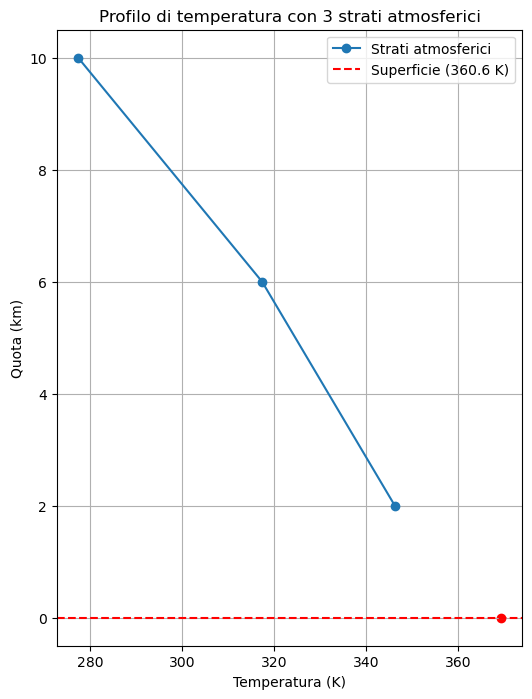

In [11]:
# Plot del profilo di temperatura
plt.figure(figsize=(6, 8))
plt.plot(T_layers_conv, altitude / 1000, marker='o', label='Strati atmosferici')  # Conversione in km
plt.axhline(y=0, color='r', linestyle='--', label=f'Superficie ({T_surf:.1f} K)')
plt.scatter(T_surf_conv, 0, color='red')


plt.xlabel('Temperatura (K)')
plt.ylabel('Quota (km)')
plt.legend()
plt.title(f'Profilo di temperatura con {N} strati atmosferici')
plt.grid()
plt.show()

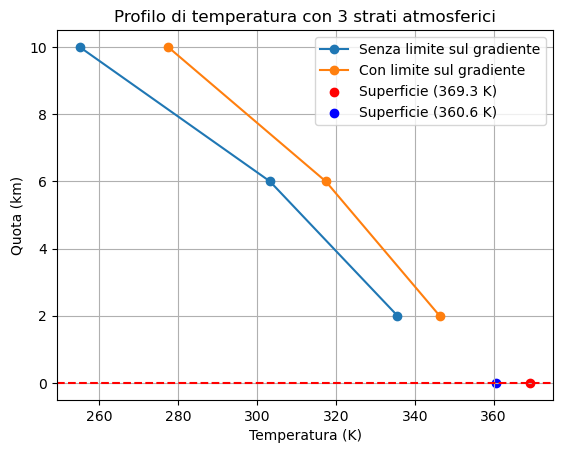

In [12]:
import matplotlib.pyplot as plt

# Supponiamo che T_layers_no_constraint e T_layers_with_constraint siano già calcolati

# Plot del profilo di temperatura senza constraint
plt.plot(T_layers, altitude / 1000, marker='o', label='Senza limite sul gradiente')

# Plot del profilo di temperatura con constraint
plt.plot(T_layers_conv, altitude / 1000, marker='o', label='Con limite sul gradiente')

# Aggiungi una linea orizzontale per la temperatura della superficie
plt.axhline(y=0, color='r', linestyle='--')
plt.scatter(T_surf_conv, 0, color='red', label=f'Superficie ({T_surf_conv:.1f} K)')
plt.scatter(T_surf, 0, color='blue', label=f'Superficie ({T_surf:.1f} K)')

# Etichette e titolo
plt.xlabel('Temperatura (K)')
plt.ylabel('Quota (km)')
plt.legend()
plt.title(f'Profilo di temperatura con {N} strati atmosferici')
plt.grid()

# Mostra il plot

CON N=2 LAYER AGGIUNGI STRATO A CONTATTO CON LA SUPERIFICE E STRATO STRATOSFERICO SENZA MODIFICARE LA TEMPERATURA DEI 2 STRATI 

T_SURF (superficie)
T_0 strato a contatto con superficie

In [46]:
T1 = T_layers[0] # 1 strato atmo
T2 = T_layers[1] # 2 strato atmo

In [47]:
T_surf

335.6017392743409

1.0


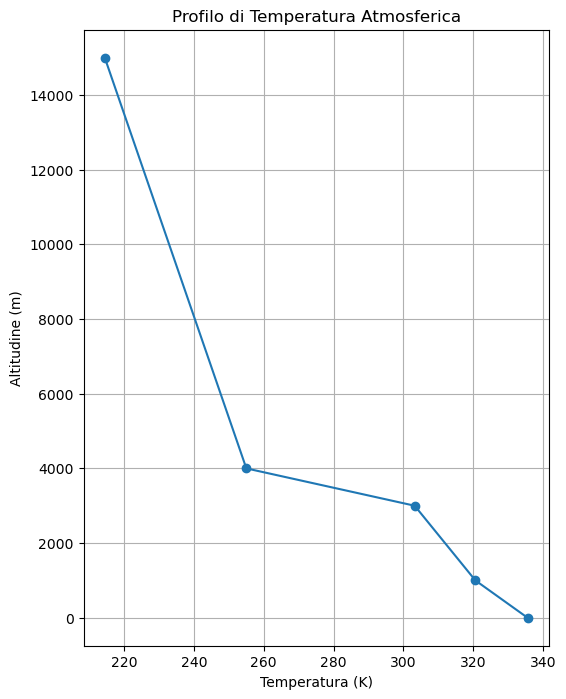

T_surface = 335.60 K
T0 (near surface) = 320.65 K
T1 (troposfera bassa) = 303.25 K
T2 (troposfera alta) = 255.00 K
T3 (stratosfera) = 214.43 K


In [48]:
### **Step 2: Aggiunta degli Strati Sottile (Near Surface e Stratosfera)** ###
T0 = T_surf  # Strato sottile vicino alla superficie
T3 = T_layers[1]  # Strato sottile in stratosfera

print(epsilon)
epsilon = 1
N_iter = 1000

F_surface = sigma * T_surf**4
F1 = sigma * T1**4
F2 = sigma * T2**4

# Iterazione per il nuovo equilibrio
for _ in range(N_iter):

    # Radiazione emessa

    F0 = sigma * T0**4
    F3 = sigma * T3**4

    # Aggiornamento delle temperature atmosferiche
    T0 = ((epsilon * (0.5 * F_surface + 0.5 * F1)) / sigma) ** 0.25
    T3 = ((epsilon * (0.5 * F2)) / sigma) ** 0.25

    # Aggiornamento temperatura superficie


# Profili di temperatura in funzione dell'altitudine
altitude = np.array([0, 1000, 3000, 4000, 15000])  # Altitudini indicative
temperature_profile = np.array([T_surf, T0, T1, T2, T3])

# Grafico del profilo di temperatura
plt.figure(figsize=(6, 8))
plt.plot(temperature_profile, altitude, marker='o', linestyle='-')
plt.xlabel('Temperatura (K)')
plt.ylabel('Altitudine (m)')
plt.title('Profilo di Temperatura Atmosferica')
plt.grid()
plt.show()

# Stampa dei risultati finali
print(f"T_surface = {T_surf:.2f} K")
print(f"T0 (near surface) = {T0:.2f} K")
print(f"T1 (troposfera bassa) = {T1:.2f} K")
print(f"T2 (troposfera alta) = {T2:.2f} K")
print(f"T3 (stratosfera) = {T3:.2f} K")
